In [19]:
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score,classification_report
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.linear_model import LogisticRegression

In [2]:
mnist = fetch_openml('mnist_784')

In [3]:
X, y = mnist['data'],mnist['target']
print(f'Format of the input matrix: {X.shape}')
print(f'First rows of X: {X[:5]}\n')
print(f'Format of the target vector: {y.shape}')
print(f'First components of the target vector: {y[:5]}\n')

Format of the input matrix: (70000, 784)
First rows of X:    pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
2      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
3      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
4      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

   p

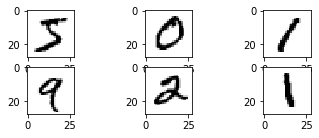

In [4]:
image= X.to_numpy()
plt.subplot(431)
plt.imshow((image[0].reshape(28,28)), cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(432)
plt.imshow(image[1].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(433)
plt.imshow(image[3].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(434)
plt.imshow(image[4].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(435)
plt.imshow(image[5].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(436)
plt.imshow(image[6].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')

In [5]:
index_number= np.random.permutation(70000)
X_shuffled, y_shuffled = X.loc[index_number], y.loc[index_number]
X_shuffled.reset_index(drop=True,inplace=True)
y_shuffled.reset_index(drop=True,inplace=True)
X_train , X_test, X_val = X_shuffled[:40000], X_shuffled[40000:60000], X_shuffled[60000:]
y_train , y_test, y_val = y_shuffled[:40000], y_shuffled[40000:60000], y_shuffled[60000:]

In [23]:
#svc = svm.SVC(gamma='scale', class_weight='balanced', C=100)
lr = LogisticRegression(C=10.0, solver='lbfgs', max_iter=500)

In [24]:
#svc.fit(X_train, y_train)
lr.fit(X_train, y_train)

/home/danilomicaias/miniconda3/envs/dim0494/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10.0, max_iter=500)

In [22]:
y_test_predicted = lr.predict(X_test)
print(f'Accuracy :{accuracy_score(y_test, y_test_predicted)}\n')
print('Classification report:')
print(classification_report(y_test, y_test_predicted))

Accuracy :0.90475

Classification report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2020
           1       0.94      0.96      0.95      2284
           2       0.89      0.88      0.89      1980
           3       0.89      0.87      0.88      1987
           4       0.91      0.91      0.91      1916
           5       0.86      0.83      0.85      1813
           6       0.94      0.93      0.94      1989
           7       0.91      0.93      0.92      2046
           8       0.86      0.86      0.86      1986
           9       0.88      0.90      0.89      1979

    accuracy                           0.90     20000
   macro avg       0.90      0.90      0.90     20000
weighted avg       0.90      0.90      0.90     20000

